<h1>
<center>CFRM 521, Spring 2020</center>
</h1>

<h1>
<center>Franklin Williams</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Monday 18th May 2020, at 11:59pm**

* You may submitted this homework with one other classmate. If you are submitting in a group of two, only one of you must submit the homework. The other must make a comment on Canvas (where you would submit the homework) mentioning that they are submitting with another person. Also, please include both of your names in the homework submission.


* Late homework are allowed, **but a 10% penalty per day applies.** Example: submitting on Tuesday 00:01am results in 10% penalty, on Wednesday 00:01am results in 20% penalty, etc. Your last submission is considered for calculating the penalty.


*  Please use this Jupyter notebook as a template for your solutions. Your solution must be submitted as one Jupyter notebook. You are allowed to use code from the textbook, textbook website, or lecture notes. However, please go over the code you are using.

### Note: Text book code and appendix answers were utilized in the creation of this assignment.

# 1. Exercise 10 of Chapter 8
## (a)
Load the MNIST dataset and take only the first 10,000 observations as `X` and `y`.  Use the nonlinear dimension reduction technique **t-SNE** to reduce this subset of MNIST dataset down to two dimensions. Measure how long it took to reduce dimension. This will be used in answering part (c). Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class. You should get a nice visualization of different classes. Which classes are easily identified and which ones can be hard to distinguish?

In [16]:
import numpy as np

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]
y = list(map(int, y))

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
%time X_reduced = tsne.fit_transform(X)

CPU times: user 6min 13s, sys: 5.09 s, total: 6min 18s
Wall time: 3min 15s


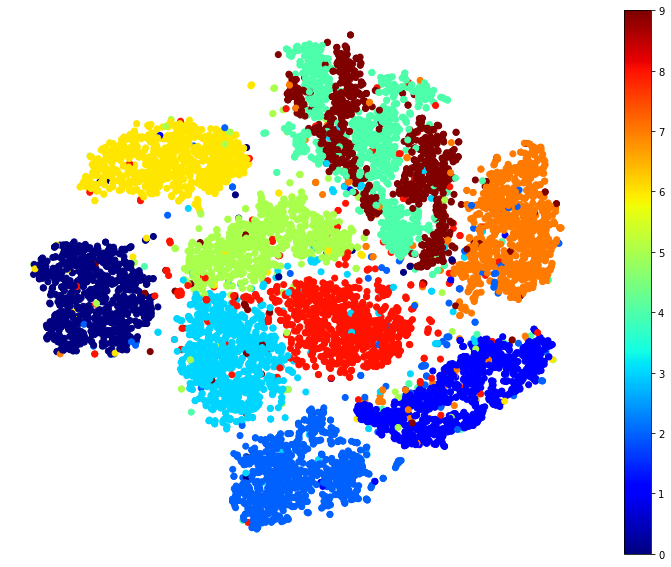

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Discussion: It appears that the digits 0 and 6 cluster well and can easily be distinguished from the dataset. The digits 4 and 9 appear to overlap in the cluster map above. This indicates these two digits are similar and will be more difficult for the algorithm to correctly identify. Additionally, the digits 5 and 3 appear to overlap.

## (b)
Obtain alternative visualizations as suggested in the corresponding Jupyter notebook for the solution of this exercise. You can write colored digits at the location of each instance and plot scaled-down versions of the digit images themselves. In the latter case, the visualization will be too cluttered if you draw the image for every observation. So, you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. Try to get at least one nice visualization with well-separated clusters of digits.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)


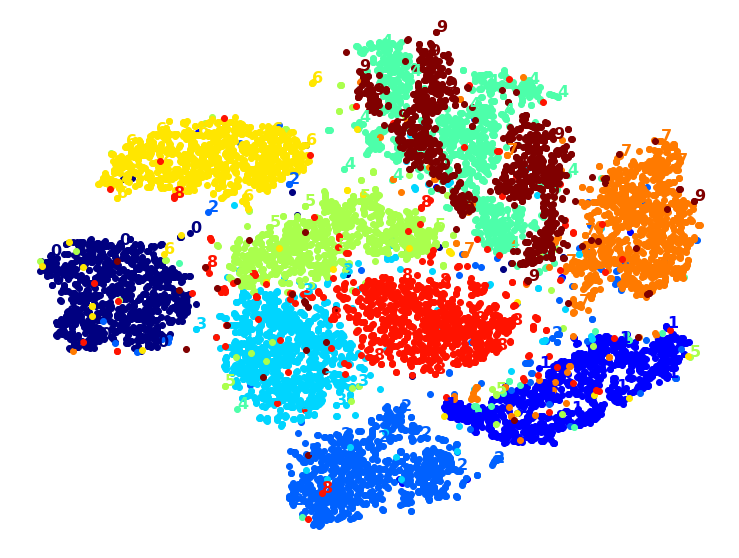

In [20]:
plot_digits(X_reduced, y)

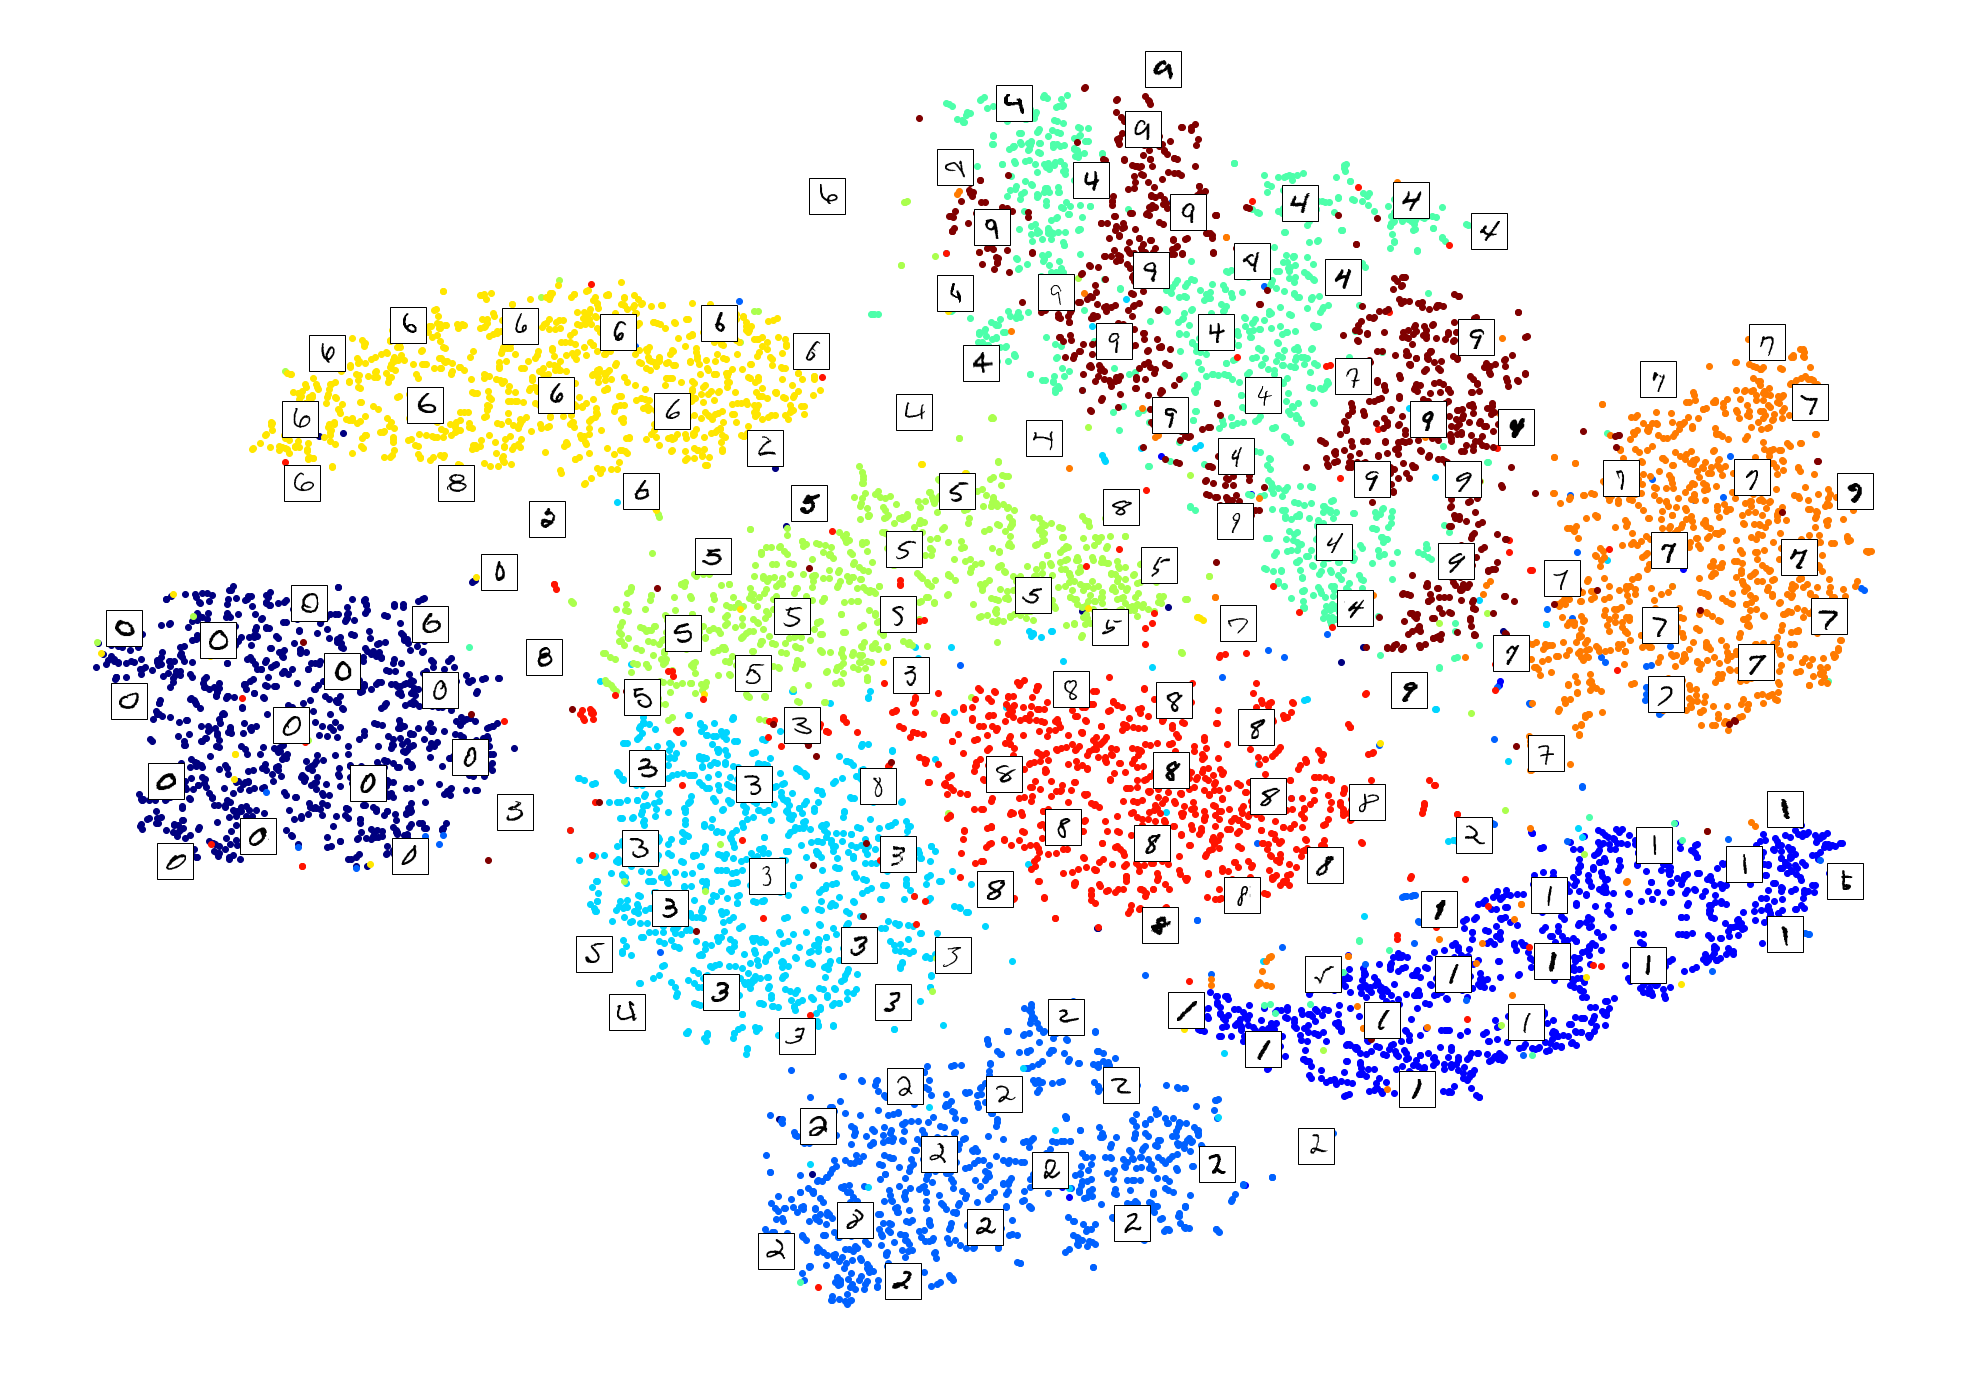

In [21]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

## (c)
Try using other dimensionality reduction algorithms. Specifically, try:

* Regular PCA (down to 2 dimensions).
* LLE to 2 dimensions.
* First PCA with explained variance ratio of 95%, then apply LLE to reduce to 2 dimensions.
* LDA to 2 dimensions.
* First PCA with explained variance ratio of 95%, then apply t-NSE to reduce to 2 dimensions.

For each algorithm, report how long it took the algorithm to reduce the dimension. Also, provide a 2D plot of the results, using one of the plots in part (a) or (b). Which method runs faster? Which one results in a better visualization? Include t-SNE in part (a) in your comparison.

PCA took 0.5s.


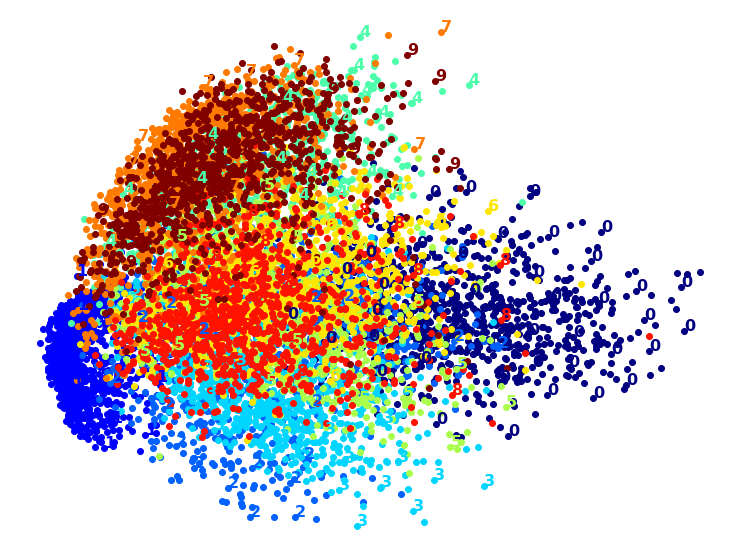

In [23]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

LLE took 128.4s.


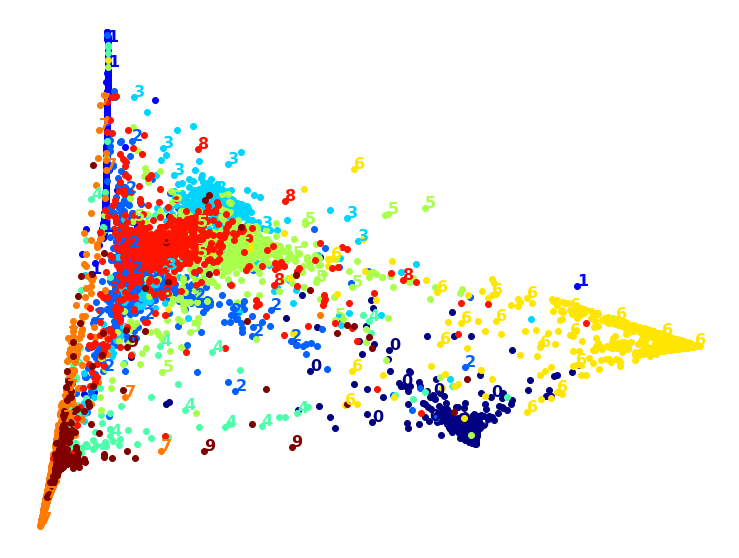

In [24]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE took 49.9s.


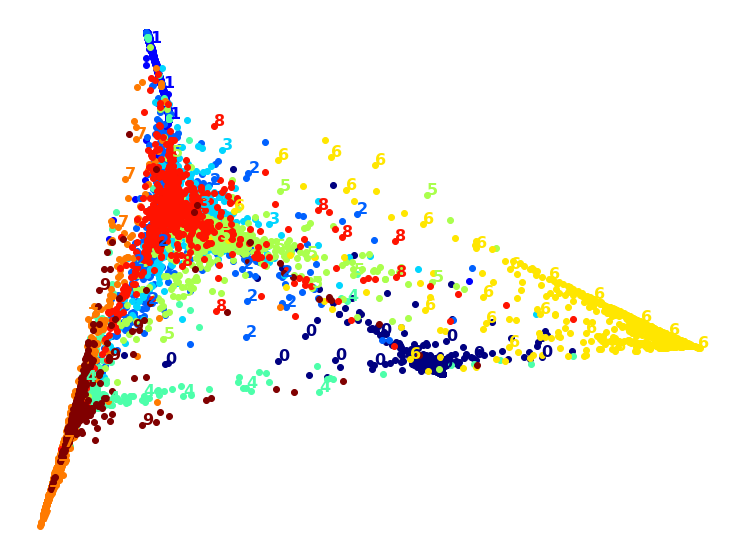

In [25]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

LDA took 2.1s.


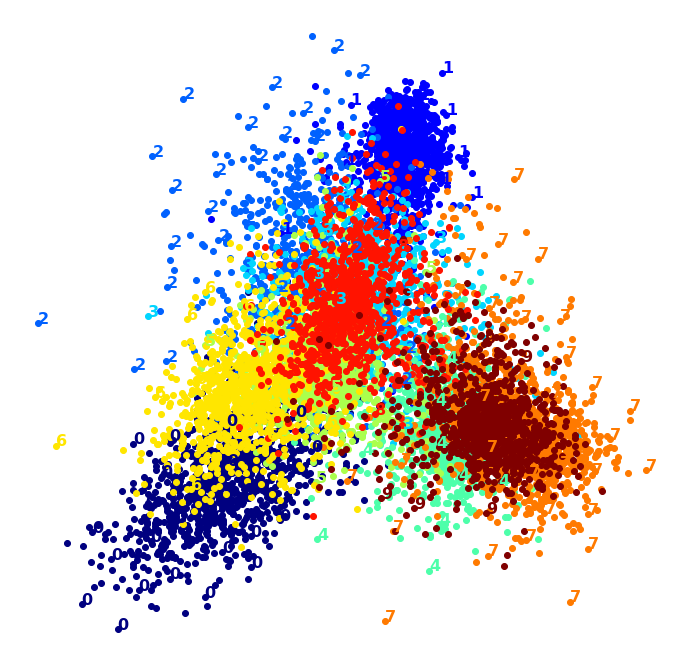

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

PCA+t-SNE took 104.1s.


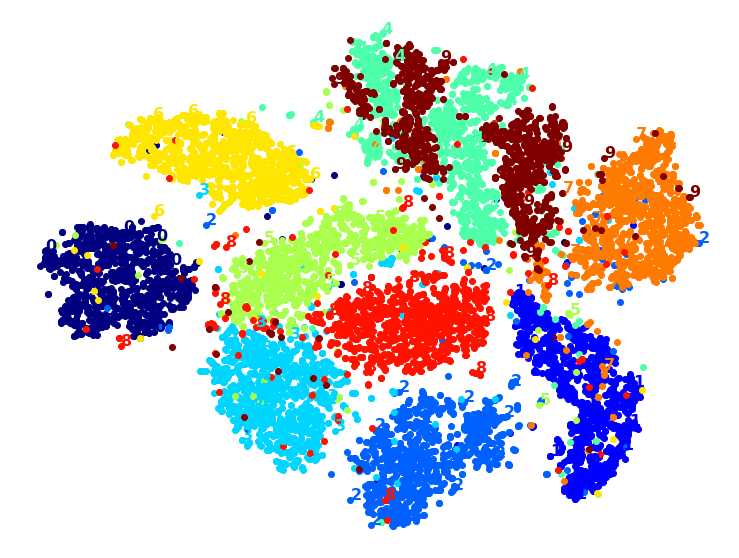

In [27]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

Discussion:  
PCA took 0.5s  
LLE took 128.4s  
PCA+LLE took 49.9s  
LDA took 2.1s  
PCA+t-SNE took 104.1s  
t-SNE took 3min 15s  (part a)    

Although PCA was by far the fastest, it does not produce a useful visualization. There is extreme overlap in the digits and they cannot be easily distinguished from each other. LLE and PCA+LLE not only took much longer, but also do not produce useful visualizations. LDA is also fast, but many of the clusters have extreme overlap.

It appears that t-SNE produces the most useful clustering of digits. In (a) the algorithm takes roughly 3 minutes to produce results. By utilizing PCA in addition to t-SNE, we are able to cut the runtime of the algorithm to 104.1s. Not only did the speed of the algorithm increase, but it does not appear that information was lost when used in conjunction with PCA.


# 2. 
## (a) Exercises 10 of Chapter 9 of the textbook.

How can you set a variable to any value you want (during the execution phase)?

To set a variable to another desired value, you create an assignment node, tf.assign(), in the graph construction phase. In this node, you pass in the variable and a place holder as parameters. Then during the execution phase, you can run the assigment operation and pass on the variables new desired value. Example code from the text book solutions is below:

In [ ]:
import tensorflow as tf

x = tf.Variable(tf.random_uniform(shape=(), minval=0.0, maxval=1.0))
x_new_val = tf.placeholder(shape=(), dtype=tf.float32)
x_assign = tf.assign(x, x_new_val)

with tf.Session():
    x.initializer.run() # random number is sampled *now* 
    print(x.eval()) # 0.646157 (some random number) 
    x_assign.eval(feed_dict={x_new_val: 5.0}) 
    print(x.eval()) # 5.0


## (b) Exercises 11 of Chapter 9 of the textbook.

How many times does reverse-mode autodiff need to traverse the graph in order to compute the gradients of the cost function with regards to 10 variables? What about forward-mode autodiff? And symbolic differentiation?

Reverse-mode autodiff needs to traverse the graph twice to compute the gradients of the cost function.  
Forward-mode autodiff needs to traverse the graph ten times to compute the gradients of the cost function.  
Symbolic differentiation does not traverse the origiinal graph, but rather builds a different graph to compute the gradients.

# 3. Finding regimes in a time series

## (a)
You can obtain daily values of NASDAQ Composite Index going back to Feb 1971 from [FRED](https://fred.stlouisfed.org/series/NASDAQCOM#). Calculate daily returns of this index and obtain daily estimates of its volatility. You are free to choose your preferred method of estimation. For example, you can simply use the standard deviation of the last 25 daily returns, or you can fit a GARCH(1,1) model. In the latter case, you may find [rpy2](https://rpy2.github.io/) package useful. 

In [119]:
import pandas as pd

NASDAQ = pd.read_csv('NASDAQCOM.csv')
NASDAQ = NASDAQ[~NASDAQ['NASDAQCOM'].isin(['.'])]
NASDAQ['NASDAQCOM'] = pd.to_numeric(NASDAQ['NASDAQCOM'])
NASDAQ['DATE'] = pd.to_datetime(NASDAQ['DATE'])
NASDAQ = NASDAQ.set_index('DATE')
NASDAQ['ret'] = NASDAQ['NASDAQCOM'].pct_change()
NASDAQ['vol'] = NASDAQ['ret'].rolling(25).std()
NASDAQ = NASDAQ.dropna()

## (b)
Split your volatility estimates into a training set (before Jan 2005) and a test set (Jan 2005 and after). Leave aside the test set, we will get back to it in part (c). Now, ignore the time aspect of your training set and treat it as a 1-dimensional dataset with the only feature being the daily volatility. Use k-Means to divide your training set into a number of **regimes**. A regime is an interval for volatility. Use the three methods discussed in lecture 11 (namely, 1) inertia, 2) silhouette scores, and 3) silhouette diagram) to find the number of regimes. If you get nonsensical result (e.g. 1 cluster or 10 clusters), use 3 clusters for the remainder of this exercise. Report the centroid of your regimes. Also, plot a time series showing the transition from one centroid to another through time (for the training set).

In [142]:
train, test = NASDAQ['vol'].loc[:'2004'], NASDAQ['vol'].loc['2005':]
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)

In [143]:
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters=5, random_state=42)
kmc.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

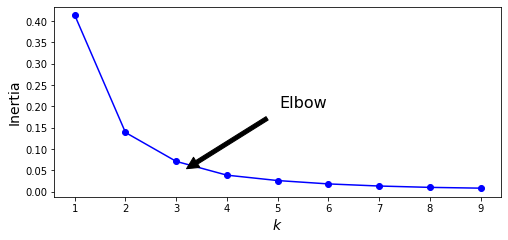

In [144]:

kmc_per_k = [KMeans(n_clusters=k, random_state=42).fit(train)
             for k in range(1, 10)]
inertias = [model.inertia_ for model in kmc_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])
plt.show()

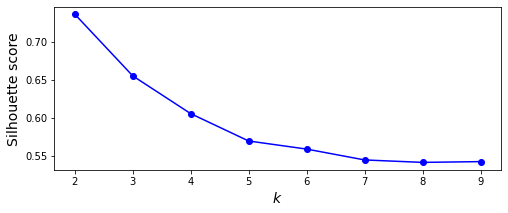

In [145]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(train, model.labels_)
                     for model in kmc_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

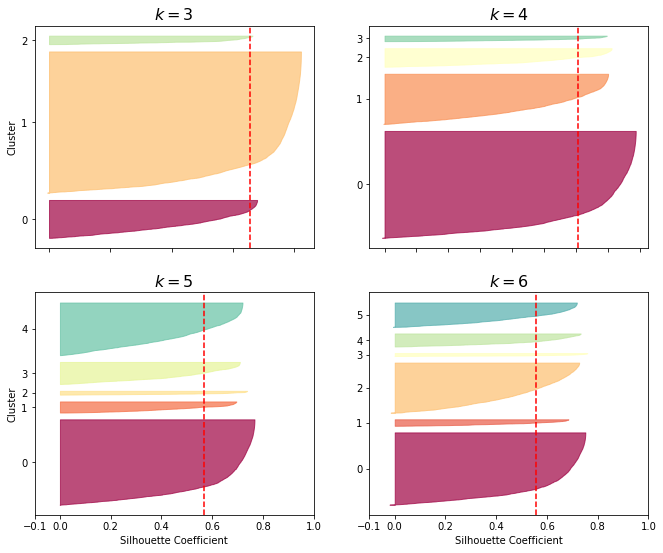

In [156]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmc_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(train, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

In [217]:
kmc = KMeans(n_clusters=4, random_state=42)
kmc.fit(train)
kmc.cluster_centers_


array([[0.0057483 ],
       [0.0112204 ],
       [0.02054471],
       [0.03668781]])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


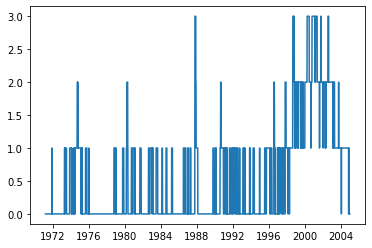

In [218]:
train_df = NASDAQ.loc[:'2004']
train_df['regime'] = kmc.labels_
plt.plot(train_df['regime'])

$\newcommand\1{\mathbf{1}}$
$\newcommand\0{\mathbf{0}}$
$\newcommand\Nc{\mathcal{N}}$
$\newcommand\Rb{\mathbb{R}}$
$\newcommand\Pb{\mathbb{P}}$
$\newcommand\Eb{\mathbb{E}}$
$\newcommand\tht{\theta}$
$\newcommand\sig{\sigma}$
$\newcommand\al{\alpha}$
$\newcommand\lam{\lambda}$
$\newcommand\gam{\gamma}$
$\newcommand\eps{\varepsilon}$
$\newcommand\av{\mathbf{a}}$
$\newcommand\bv{\mathbf{b}}$
$\newcommand\cv{\mathbf{c}}$
$\newcommand\ellv{\mathbf{\ell}}$
$\newcommand\wv{\mathbf{w}}$
$\newcommand\Iv{\mathbf{I}}$
$\newcommand\xv{\mathbf{x}}$
$\newcommand\yv{\mathbf{y}}$
$\newcommand\zv{\mathbf{z}}$
$\newcommand\Av{\textbf{A}}$
$\newcommand\Dv{\textbf{D}}$
$\newcommand\Xv{\textbf{X}}$
$\newcommand\Yv{\textbf{Y}}$
$\newcommand\yb{\overline{y}}$
$\newcommand\thtv{\boldsymbol\tht}$
$\newcommand\lamv{\boldsymbol\lambda}$
$\newcommand\thtvh{\widehat{\thtv}}$
$\newcommand\epsh{\widehat{\eps}}$
$\newcommand\phat{\widehat{p}}$
$\newcommand\yh{\widehat{y}}$
$\newcommand\Yh{\widehat{Y}}$
$\newcommand\wvh{\widehat{\wv}}$
$\newcommand\bh{\widehat{b}}$
## (c)

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next day volatility regime depends only on today's vol regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \Pb(X_{t+1}=j|X_t=i)$ in which $X_t$ is the vol regime at day $t$. Using the time series of regimes (in the training set) that you find in part (c), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\Pb(X_{t+1}=j \text{ and } X_t=i)}{\Pb(X_t=i)}\approx \frac{\text{number of transition from regime i to j}}{\text{number of transition from regime i}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do **NOT** retrain your k-Means clusterer, simply used it to predict the regimes of the test set. Then, repeat the estimation method above on the resulting time series of regimes. Comment on the performance of your regime switching models. Do the transition probabilities changes between the training and test sets? Explain.

In [219]:
# code taken from: https://stackoverflow.com/questions/46657221/generating-markov-transition-matrix-in-python

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [round(f/s, 4) for f in row]
    return M
transition_matrix(train_df['regime'])

[[0.9833, 0.0167, 0.0, 0.0],
 [0.0356, 0.9509, 0.0135, 0.0],
 [0.0, 0.0366, 0.9542, 0.0092],
 [0.0, 0.0, 0.031, 0.969]]

In [220]:
pred_regime = kmc.predict(test)
transition_matrix(pred_regime)

[[0.961, 0.039, 0.0, 0.0],
 [0.0396, 0.9443, 0.0161, 0.0],
 [0.0, 0.0549, 0.9341, 0.011],
 [0.0, 0.0, 0.0379, 0.9621]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


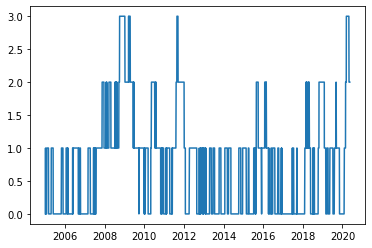

In [264]:
test_df = NASDAQ.loc['2005':]
test_df['regime'] = pred_regime
plt.plot(test_df['regime'])

Discussion:  
Four regimes were chosen based on the silhouette diagram. We see that the four clusters appear roughly uniform and each of the clusters has roughly half of the observations meeting the silhouette cutoff. In the training data, it appears that a regime has a very high probabilyt to remain constant. In each of the four cases, there is at least a 93% chance that the regime will stay constant. From the training set, this data makes intuitive sense and matches with historical financial regimes. We see a large spike in 1987 as well as 2001. In both of these periods, large market shocks occured (namely the oil crisis and 2001 dot com bubble).  

The Markov Chain matrix appears consistent within the testing data. Additionally, periods of economic uncertainity are correctly predicted by the regime clustering model. During the Global Financial Crisis of 2008 and the most recent economic turmoil brought on COVID-19, we see regime changes.

# 4. A Regression MLP
Load, split, and scale the California housing dataset from Scikit-Learn (the original one, not the modified one that we introduced in lecture 1), as follows

In [253]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## (a)
Use `tensorflow.keras` to train a regression MLP with one hidden layer of 30 ReLU neurons. Use (`X_train`,`y_train`) as the training set. Report the mean squared error on (`X_valid`, `y_valid`) during training. Train for 30 epochs. To achieve this, use the following form of the `.fit()` method of the Keras model:

In [240]:
.fit(X_train, y_train, epochs=30,
     verbose=1,
     validation_data=(X_valid, y_valid))

SyntaxError: invalid syntax (<ipython-input-240-3c2af2a66b6b>, line 1)

**Hint:** You need a single neuron output layer without an activation function. Use `loss="mean_squared_error"` when compiling the Keras model.

In [260]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers

mlp = Sequential([
    layers.Dense(30, activation="relu"),
    layers.Dense(1)
])

mlp.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])
model = mlp.fit(X_train, y_train, epochs=30,
     verbose=1,
     validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8059 - accuracy: 0.0029 - val_loss: 0.8913 - val_accuracy: 0.0044
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.0029 - val_loss: 0.7925 - val_accuracy: 0.0044
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4327 - accuracy: 0.0028 - val_loss: 1.1363 - val_accuracy: 0.0044
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.0028 - val_loss: 2.6143 - val_accuracy: 0.0044
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4201 - accuracy: 0.0028 - val_loss: 7.7220 - val_accuracy: 0.0044
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.0029 - val_loss: 1.9064 - val_accuracy: 0.0044
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4045 - accuracy: 0.0028 - val_loss: 0.3669 - val_accuracy: 0.0044
Epoch 

## (b)
Plot the learning curves from part (a). Does it look like that the model is overfitting?

**Hint:** After training, the `.history` variable of the trained model has the training and validation metrics (which is the mean squared error if you follow the hint in part (a)). 

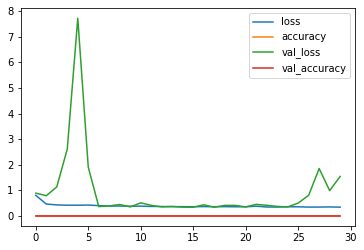

In [261]:
pd.DataFrame(model.history).plot()

In [262]:
score, acc = mlp.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

162/162 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.0021
Test score: 0.34746912121772766
Test accuracy: 0.0021317829377949238


Discussion:  
It appears that the model is severly underfitting the data. In both the training and the test set the accuracy of the single layer network is practically zero.

# 5. optional exercise
You do not need to submit the solution of this exercise (there is nothing to submit, actually). However, I strongly recommend that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** modify the network architecture to have just one hidden layer with three neurons and ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on top left. Notice that the training time and the shape of the decision borders vary a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random, I saw this twice in the first 30 runs).

## (d)

**Not enough neurons:** next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.